# Regularization

Deep Learning models have so much flexibility and capacity that **overfitting can be a serious problem**, if the training dataset is not big enough.


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io

from regu_utils import (
    sigmoid,
    relu,
    plot_decision_boundary,
    initialize_parameters,
    load_2D_dataset,
    predict_dec,
    compute_cost,
    predict,
    forward_propagation,
    backward_propagation,
    update_parameters,
)

from testDataGen import *

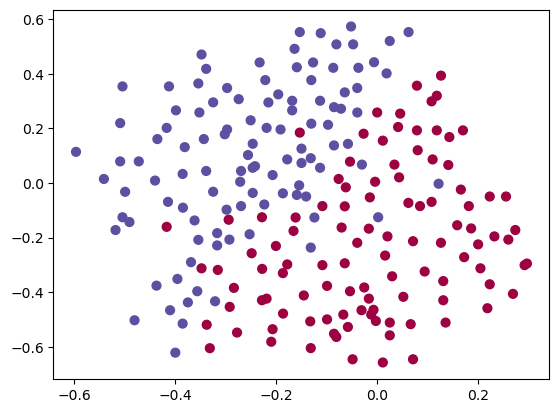

In [2]:
# Import Dataset
train_X, train_Y, test_X, test_Y = load_2D_dataset()

### 1.) Non Regularized Model

### 2.) Regularized Model

        a.) L2 Regularization
        b.) Dropout Regularization


In [3]:
# NN Model
def NN_model(X, Y, lr=0.3, num_itr=30000, pc=True, lambd=0, keep_prob=1):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 20, 3, 1]

    # Initialize params
    params = initialize_parameters(layers_dims)

    # Gradiant Descent Loop
    for i in range(0, num_itr):

        # Dropout Regulization or No. Dropout
        if keep_prob == 1:
            a3, cache = forward_propagation(X, params)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, params, keep_prob)

        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, params, lambd)

        # Backpropogation
        assert (
            lambd == 0 or keep_prob == 1
        )  # We are choosing to use only one type of regularization at a time L2 or Dropout

        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)

        # Update Params
        params = update_parameters(params, grads, lr)

        # Print the loss every 10000 iterations
        if pc and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if pc and i % 1000 == 0:
            costs.append(cost)
    # plot the cost
    plt.plot(costs)
    plt.ylabel("cost")
    plt.xlabel("iterations (x1,000)")
    plt.title("Learning rate =" + str(lr))
    plt.show()

    return params

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.1632998752572419
Cost after iteration 20000: 0.13851642423239133


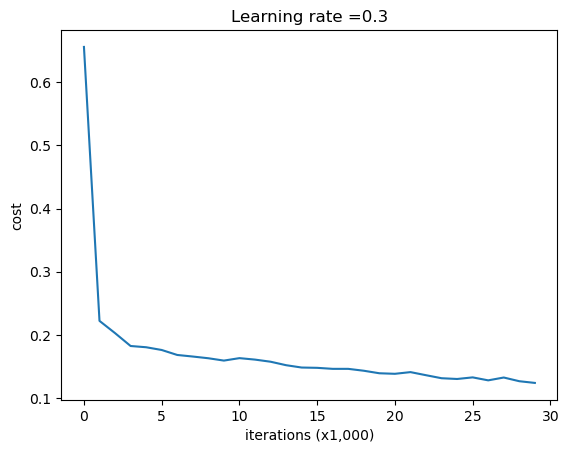

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [4]:
# No Regularization
params = NN_model(train_X, train_Y)
print("On the training set:")
predictions_train = predict(train_X, train_Y, params)
print("On the test set:")
predictions_test = predict(test_X, test_Y, params)

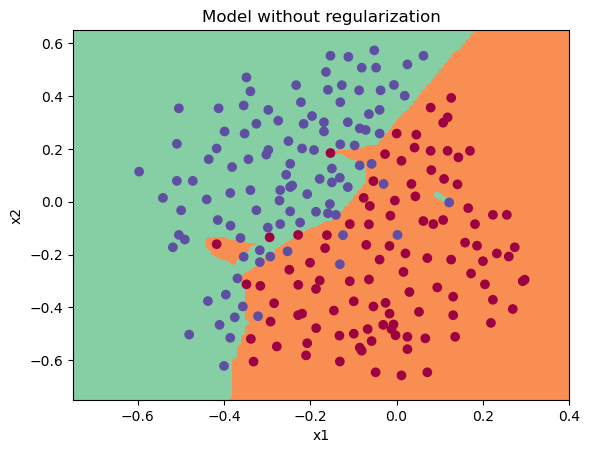

In [5]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)

In [6]:
# L2 Regularization



def compute_cost_with_regularization(A3, Y, params, lambd):

    m = Y.shape[1]

    W1 = params["W1"]

    W2 = params["W2"]

    W3 = params["W3"]


    cc_cost = compute_cost(A3, Y)  # This gives cross_entropy_cost

    L2_Regularization_cost = (
        lambd
        / (2 * m)
        * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    )


    cost = cc_cost + L2_Regularization_cost

    return cost

In [7]:
A3, Y_assess, params = compute_cost_with_regularization_test_case()

print(
    "cost = " + str(compute_cost_with_regularization(A3, Y_assess, params, lambd=0.1))
)

cost = 1.7864859451590758


In [8]:
# Backward Propogation with regularization
def backward_propagation_with_regularization(X, Y, cache, lambd):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T) + (lambd / m) * W3
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambd / m) * W2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = (1 / m) * np.dot(dZ1, X.T) + (lambd / m) * W1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        "dZ3": dZ3,
        "dW3": dW3,
        "db3": db3,
        "dA2": dA2,
        "dZ2": dZ2,
        "dW2": dW2,
        "db2": db2,
        "dA1": dA1,
        "dZ1": dZ1,
        "dW1": dW1,
        "db1": db1,
    }
    return grads

In [9]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd=0.7)
print("dW1 = \n" + str(grads["dW1"]))
print("dW2 = \n" + str(grads["dW2"]))
print("dW3 = \n" + str(grads["dW3"]))

dW1 = 
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = 
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = 
[[-1.77691347 -0.11832879 -0.09397446]]


Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


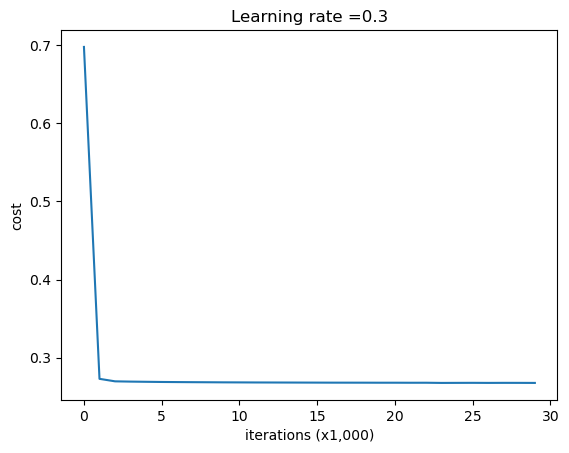

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [10]:
params = NN_model(train_X, train_Y, lambd=0.7)
print("On the train set:")
predictions_train = predict(train_X, train_Y, params)
print("On the test set:")
predictions_test = predict(test_X, test_Y, params)

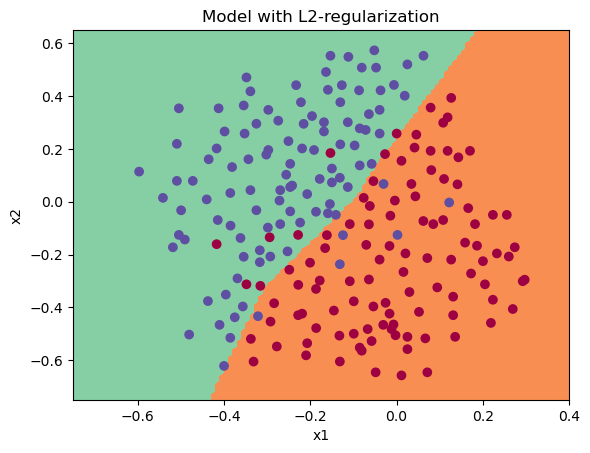

In [11]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)

In [12]:
# Dropout Regularization


## Forward Propogation with dropout
def forward_propagation_with_dropout(X, params, keep_probs=0.5):
    np.random.seed(1)

    # Params
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = (D1 < keep_probs).astype(int)
    A1 = A1 * D1
    A1 = A1 / keep_probs

    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)

    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = (D2 < keep_probs).astype(int)
    A2 = A2 * D2
    A2 = A2 / keep_probs

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache

In [13]:
X_assess, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(X_assess, parameters, 0.7)
print("A3 = " + str(A3))

A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]


In [14]:
## Backward Propogation with dropout
def backward_propagation_with_dropout(X, Y, cache, keep_probs=0.5):
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = (1.0 / m) * np.dot(dZ3, A2.T)
    db3 = (1.0 / m) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dA2 = dA2 * D2
    dA2 = dA2 / keep_probs
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = (1.0 / m) * np.dot(dZ2, A1.T)
    db2 = (1.0 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dA1 = dA1 * D1
    dA1 = dA1 / keep_probs
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = (1.0 / m) * np.dot(dZ1, X.T)
    db1 = (1.0 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        "dZ3": dZ3,
        "dW3": dW3,
        "db3": db3,
        "dA2": dA2,
        "dZ2": dZ2,
        "dW2": dW2,
        "db2": db2,
        "dA1": dA1,
        "dZ1": dZ1,
        "dW1": dW1,
        "db1": db1,
    }

    return grads

In [15]:
X_assess, Y_assess, cache = backward_propagation_with_dropout_test_case()

grads = backward_propagation_with_dropout(X_assess, Y_assess, cache, 0.8)

print("dA1 = \n" + str(grads["dA1"]))
print("dA2 = \n" + str(grads["dA2"]))

dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


Cost after iteration 0: 0.6543912405149825


c:\Users\kumar\Documents\Code\MyCode\ML_Concepts_Revision\Regularization\regu_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
c:\Users\kumar\Documents\Code\MyCode\ML_Concepts_Revision\Regularization\regu_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.061016986574905605
Cost after iteration 20000: 0.060582435798513114


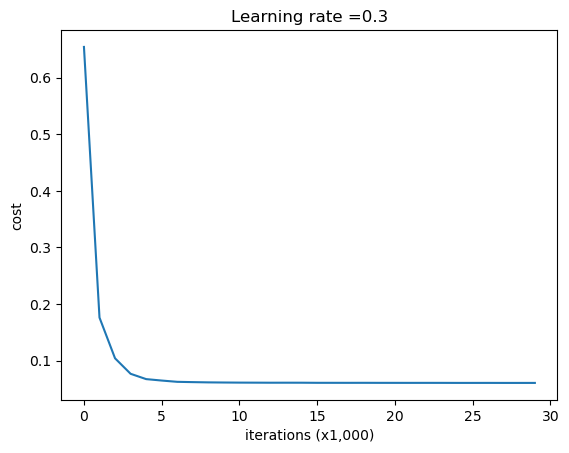

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [16]:
params = NN_model(train_X, train_Y, keep_prob=0.86, lr=0.3)
print("On the train set:")
predictions_train = predict(train_X, train_Y, params)
print("On the test set:")
predictions_test = predict(test_X, test_Y, params)

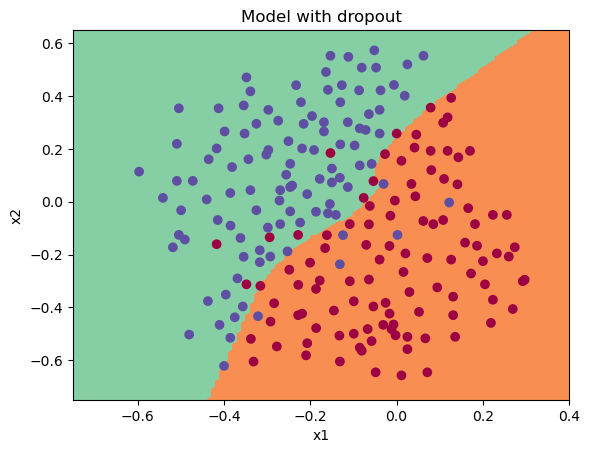

In [17]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)

**Here are the results of our three models**:

<table> 
    <tr>
        <td>
        model
        </td>
        <td>
        train accuracy
        </td>
        <td>
        test accuracy
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN without regularization
        </td>
        <td>
        95%
        </td>
        <td>
        91.5%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        94%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
</table>
